In [25]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt



In [26]:
#importing the datadet
Loan_data = pd.read_csv("loan_data.csv")

In [27]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [28]:
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [29]:
#Checking for missing values and summing them
Loan_data.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
#removing the missing values
Loan_data= Loan_data.dropna()

In [31]:
Loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
Loan_data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

C:\Users\5ptal\AppData\Local\Temp\ipykernel_17604\930345568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_data.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)


In [33]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


<Axes: xlabel='Education', ylabel='count'>

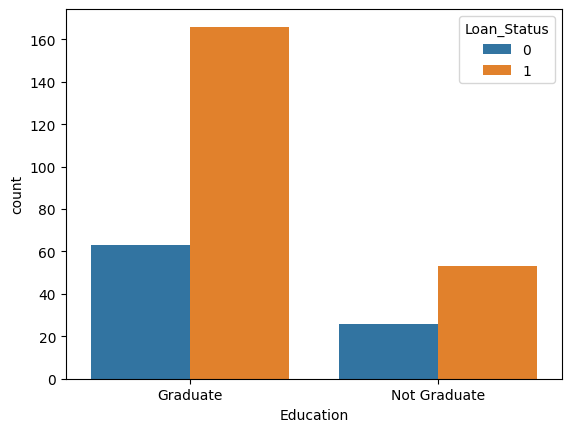

In [34]:
#Graphically showing the relationship with education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=Loan_data)


In [35]:
Loan_data= Loan_data.replace(to_replace='3+',value=4)

In [36]:
Loan_data.replace({'Gender': {'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},
                   'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Self_Employed':{'Yes':1,'No':0}} ,inplace=True)

C:\Users\5ptal\AppData\Local\Temp\ipykernel_17604\3716049513.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Loan_data.replace({'Gender': {'Male':0,'Female':1},'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},


In [37]:
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,0,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


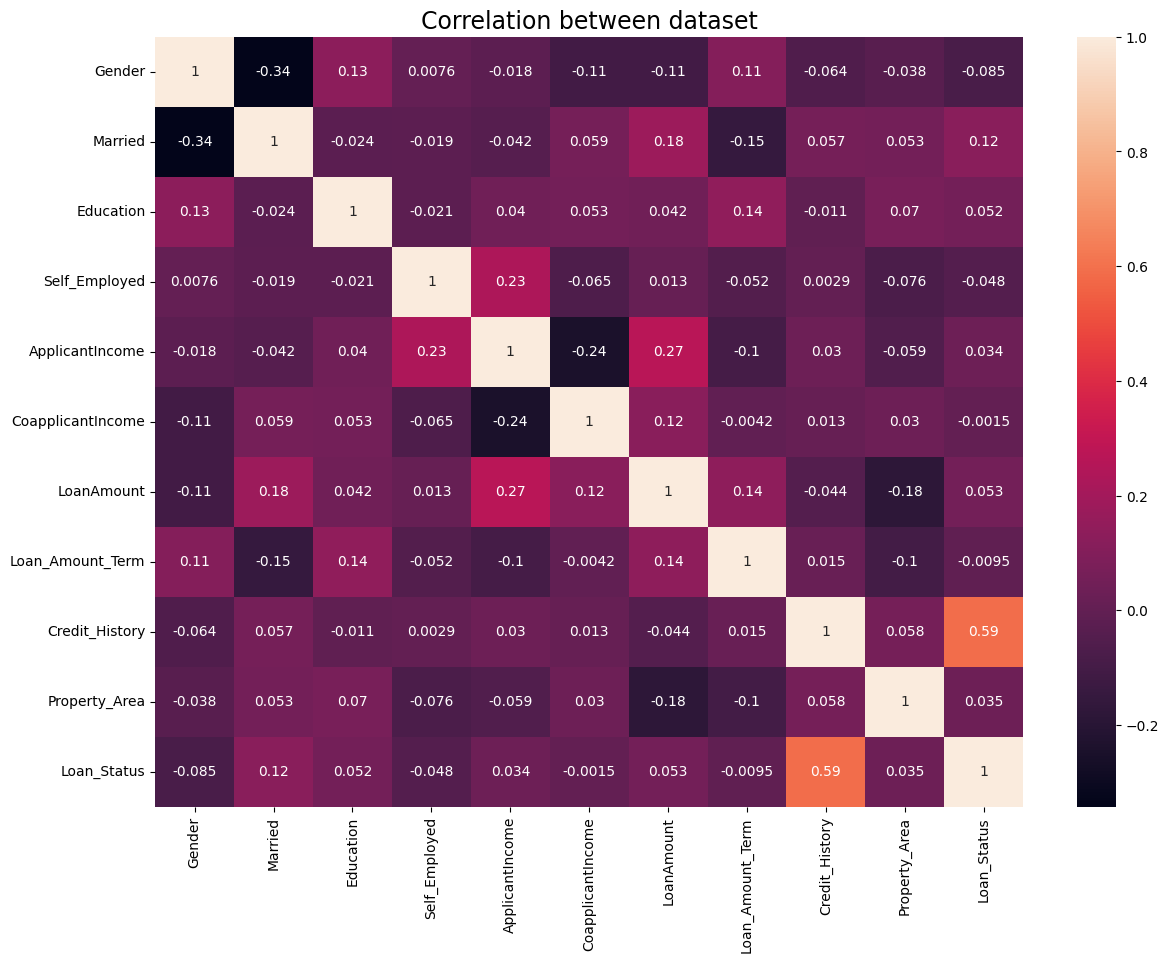

In [49]:
import seaborn as sb
plt.figure(figsize=(14,10))
sb.heatmap(Loan_data.select_dtypes(exclude=['object']).corr(),annot=True)
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

In [50]:
Loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
Loan_columns_dropped= Loan_data.drop(columns=['Gender','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Property_Area',], axis=1)

In [52]:
#Separating data and label
X=Loan_columns_dropped.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y= Loan_data['Loan_Status']

In [53]:
#Train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Training Model:
Support Vector Machine model

In [54]:
model = svm.SVC(kernel='linear')

Using pipeline for standard scaler and model

In [55]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Numeric variables pipeline
pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('model_ridge', model)
])

In [56]:
#Fit the model
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('model_ridge', SVC(kernel='linear'))])

In [57]:
#predictions and accuracy score
X_train_predictions= pipeline.predict(X_train)
X_accuracy_score= accuracy_score(X_train_predictions,Y_train)
print("Accuracy on train data:",X_accuracy_score)

Accuracy on train data: 0.8373983739837398


In [58]:
#predictions and accuracy score
X_test_predictions= pipeline.predict(X_test)
X_accuracy_score= accuracy_score(X_test_predictions,Y_test)
print("Accuracy on test data:",X_accuracy_score)

Accuracy on test data: 0.8387096774193549


Confusion Matrix:
[[ 8 10]
 [ 0 44]]


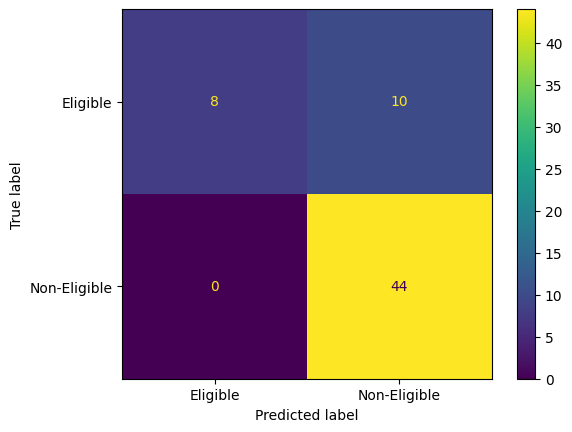

In [59]:
# Print confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, X_test_predictions)
print("Confusion Matrix:")
print(conf_matrix_svm)

cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_svm, display_labels = ["Eligible", "Non-Eligible"])
# display matrix
cm_display.plot()
plt.show()



Optimal Threshold: 1.0000


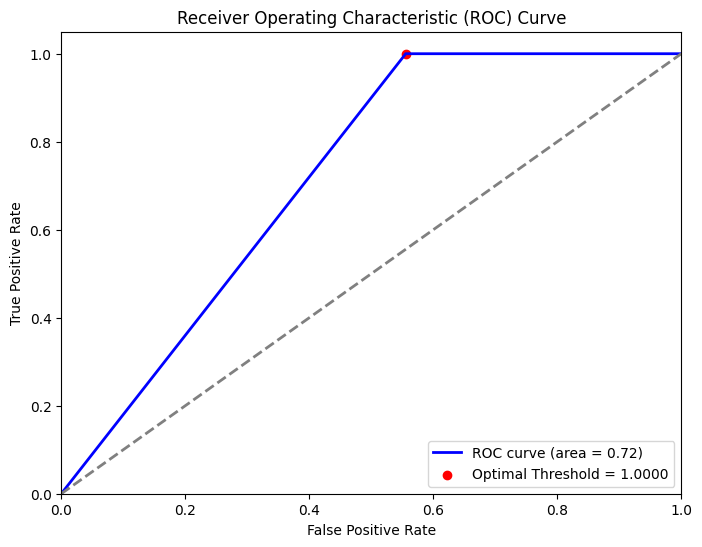

In [60]:
# Plot ROC and AUC
fpr, tpr, thresholds = roc_curve(Y_test, X_test_predictions)
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [2]:
import datawiz as dw

# 2 main functions exist
# 1st funtion, '.prescrbe' will load an excel file, classify and print columns into: numerical, categorical, datetime or #'uninformative.' 
'''It will also return the loaded data (train_data in e.g. below) and 4 list items: 
col_is_categorical (boolean list same length as the number of columns, True when column is categorical)
col_is_datetime (boolean list same length as the number of columns, True when column tells date and time) 
col_low_info (list of strings with the column names of uninformative columns. Recommended to drop these before using an ML algo)
col_good_info (list of strings with the column names of columns containing good info. Must be encoded before using an ML algo)
'''

train_data, col_categorical, col_datetime, col_low_info, col_good_info = dw.prescribe(train_path='../.csv' , test_path='../.csv', pds_chunksize=0)
              
X_clean,Y_clean,X_test,[encoders, encoded_cols],[dt_arrays, dt_cols] =dw.process(train_path=None,test_path=None,target_col=-99,exclude_cols=[],missing_values='fill',pds_chunksize=0,data_has_ws = True,encode_categories=True,dt_convert=True,drop_low_info_cols=True) 
                                 # This will remove headers, split the input and target columns,
                                 # remove useless features e.g. id or # email, and drop any columns
                                 # specified in the "exclude_cols" argument of the class instantiation.
                                 # Returns the encoders and encoded columns (both list objects) which specify the LabelEncode object and                                  # the name of the encoded column respectively. This should be used to encode columns in the test data


ModuleNotFoundError: No module named 'datawiz'